### Assignement 3

Subject: Open Source Technologies<br>
Teacher: Lendák Imre Dr<br>
Student: Maksim Kumundzhiev<br>
Neptun Code: V249C6<br>

In this assignement we are going to use 2 different approaches:
   1. Parse data using external API (yahoo_finance_api2) from Yahoo web application(<b>Non Stream</b>);
   2. Parse data using approach from scratch from Yahoo web application(<b>Stream</b>)

### 1. Yahoo API Approach (BTC - USD)

<b>Thumbnail sketch:</b>
 - Import Libraries
 - Set up credentials
 - Create a DataFrame with features (Open, Close, Volume, High, Low, Timestamp)
 - Analyse and Visualise Data 

In [162]:
#Imports

import sys
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
from IPython import display
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
from scipy.stats import kurtosis

1) Set up which data we would like to parse / In our case ration of price for Bitcoin & Dollar <br>
2) Parsing data from web application.
    - Additionally, we can tune up:
        - range of days: share.PERIOD_TYPE_DAY 
        - frequence: share.FREQUENCY_TYPE_MINUTE
3) We will get a dictionary (symbol_data) with following keys: 
    - dict_keys(['timestamp', 'open', 'high', 'low', 'close', 'volume'])             
4) After, we can create a DataFrame from dictionary using pd.DataFrame.from_dict

In [163]:
#Executed version for parsing data --> NOT STREAM

#Set up which data we would like to parse / In our case ration of price for Bitcoin & Dollar 
my_share = share.Share('BTC-USD')
symbol_data = None

#Parsing data from web application.
#Additionally, we can tune up:
# - range of days: share.PERIOD_TYPE_DAY 
# - frequence: share.FREQUENCY_TYPE_MINUTE
try:
    symbol_data = my_share.get_historical(share.PERIOD_TYPE_DAY,
                                          10,
                                          share.FREQUENCY_TYPE_MINUTE,
                                          60)
except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)

#We will get a dictionary (symbol_data) with following keys: 
#dict_keys(['timestamp', 'open', 'high', 'low', 'close', 'volume'])     
#print(symbol_data.keys())
#print(symbol_data['open'])


#After, we can create a DataFrame from dictionary using pd.DataFrame.from_dict
data = pd.DataFrame.from_dict(symbol_data)

We can see default DataFrame with financial data for BTC-USD for 10 days.
    - First issue is to figure our with timestamp column, because it is mis understandable type 
    for people and visualisation also

In [164]:
data.head()

timestamp         open         high          low        close    volume
0  1575313200000  7308.110352  7314.922363  7302.103516  7312.773438         0
1  1575316800000  7313.081055  7333.317871  7307.877930  7324.453613  57360384
2  1575320400000  7324.544922  7328.085938  7315.032715  7320.713867         0
3  1575324000000  7320.695312  7348.245605  7318.799316  7340.015625         0
4  1575327600000  7341.175293  7346.472656  7321.988281  7321.988281         0

We can do it with simple manipulations:
    - datetime.fromtimestamp(int(str(data['timestamp'][for_each_value_in_timestamp_column])[:10]
    
Ex:
   - Initially we have: 1575306000000, type: numpy.int64
   - We convert it to str and take first 10 numbers: str(data['timestamp'][for_each_value_in_timestamp_column])[:10], <b>get</b>: '1575306000', type:  str
   - We convert it back to int and use method from datetime lib: datetime.fromtimestamp(int(result_from_previous_step)), <b>get</b>: datetime.datetime(2019, 12, 2, 18, 0)
   - Do it for each value --> in this case I used list comprehansion

In [165]:
data['timestamp'] = [datetime.fromtimestamp(int(str(data['timestamp'][index])[:10])) for index in range(len(data['timestamp']))]

We can additionaly check our data for NaN values. 
    - Do it using data.info()

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
timestamp    242 non-null datetime64[ns]
open         242 non-null float64
high         242 non-null float64
low          242 non-null float64
close        242 non-null float64
volume       242 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.5 KB


### Now our data is ready for visualisation

In [167]:
data.head()

timestamp         open         high          low        close  \
0 2019-12-02 20:00:00  7308.110352  7314.922363  7302.103516  7312.773438   
1 2019-12-02 21:00:00  7313.081055  7333.317871  7307.877930  7324.453613   
2 2019-12-02 22:00:00  7324.544922  7328.085938  7315.032715  7320.713867   
3 2019-12-02 23:00:00  7320.695312  7348.245605  7318.799316  7340.015625   
4 2019-12-03 00:00:00  7341.175293  7346.472656  7321.988281  7321.988281   

     volume  
0         0  
1  57360384  
2         0  
3         0  
4         0

First we will plot graph for 5 days (it can be regularisated changing: data['timestamp'][:<b>this_value</b>])
 - It can be (this_value) from 1 up to 10, because we parsed data for 10 days;


    - On the X axis we can observe time range
    - On the Y axis we can observe price range
    - On the graph we can observe usual candles with 5 parameters: [Open, Close, Low, High, Date and Time]

In [209]:
fig = go.Figure(data=[go.Candlestick(x=data['timestamp'][:5],
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


Let us have a look on the full period of time:
    - On the graph we can observe there was a high leap on the 5th of December in approximately 13:00 p.m

In [169]:
fig = go.Figure(data=[go.Candlestick(x=data['timestamp'],
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

Also it is necessary to play around the graph!

In [170]:
from IPython.display import Video
Video("/Users/macbook/Desktop/Candle.m4v", embed=True,width=800, height=300)

After we will plot similar graph by ourselves:
    - Use default matplotlib.pyplot;
    - Chunk by chunk add different columns from DataFrame (Open, Close ...);

As we can observe, we got similar graph, but we had customized it a little bit, done the following steps:
    - High feature has green color
    - Low feature has red color
    - Open feature blue and triangles
    - Close feature yellow and stars
    - On the Y axis price has ticker of Dollar
    - On the X axis dates has similar foramt as on the previous graph

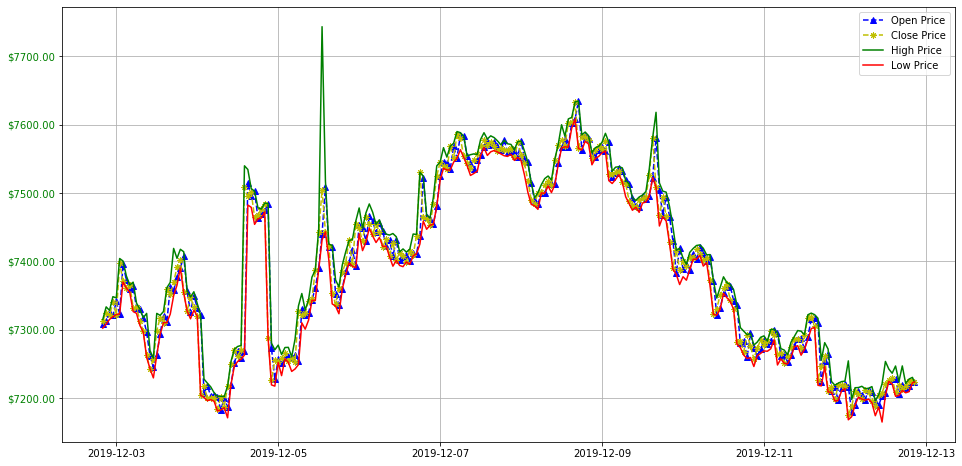

In [171]:
fig=plt.figure(figsize=(16, 8));
fig.show();
ax=fig.add_subplot(111);

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_visible(True)
    tick.label1.set_color('green')

ax.plot(data['timestamp'], data['open'], c='b', marker="^",ls='--',label='Open Price');
ax.plot(data['timestamp'],data['close'], c='y',marker=(8,2,0),ls='--',label='Close Price');
ax.plot(data['timestamp'],data['high'], c='g',ls='-',label='High Price');
ax.plot(data['timestamp'],data['low'], c='r',ls='-',label='Low Price');

plt.grid(True)
plt.legend(loc=1)
plt.draw()

After let us have a look on a different additional observations:
    - make sure we have data for 10 days

In [172]:
print(data['timestamp'].min(), data['timestamp'].max())
print(data['timestamp'].max() - data['timestamp'].min())

2019-12-02 20:00:00 2019-12-12 20:35:36
10 days 00:35:36


Let us observe on the differences between Open and Close Prices for first day and last day:
    - we can see the prices had increased on 82 and 81 dollars consistently

The difference between Open and Close Prices for first day and last day is: 
 0    7308.110352
Name: open, dtype: float64, 
 0    7312.773438
Name: close, dtype: float64, 
 241    7223.316895
Name: open, dtype: float64, 
 241    7223.316895
Name: close, dtype: float64
Total difference between Open and Close Prices for first day and last day is: 
 Open  - 85 
 Close - 89


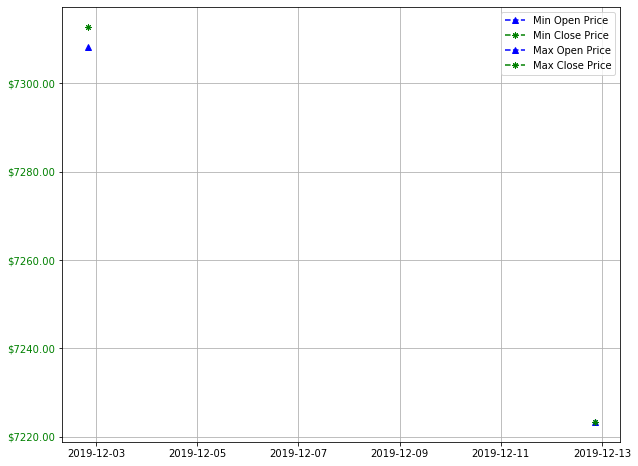

In [173]:
fig=plt.figure(figsize=(10, 8));
fig.show();
ax=fig.add_subplot(111);

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_visible(True)
    tick.label1.set_color('green')

ax.plot(data['timestamp'].min(), data[data['timestamp']==data['timestamp'].min()]['open'], c='b', marker="^",ls='--',label='Min Open Price');
ax.plot(data['timestamp'].min(),data[data['timestamp']==data['timestamp'].min()]['close'], c='g',marker=(8,2,0),ls='--',label='Min Close Price');

ax.plot(data['timestamp'].max(), data[data['timestamp']==data['timestamp'].max()]['open'], c='b', marker="^",ls='--',label='Max Open Price');
ax.plot(data['timestamp'].max(),data[data['timestamp']==data['timestamp'].max()]['close'], c='g',marker=(8,2,0),ls='--',label='Max Close Price');


plt.grid(True)
plt.legend(loc=1)
plt.draw()
print('The difference between Open and Close Prices for first day and last day is: \n {0}, \n {1}, \n {2}, \n {3}'.format(data[data['timestamp']==data['timestamp'].min()]['open'], data[data['timestamp']==data['timestamp'].min()]['close'], data[data['timestamp']==data['timestamp'].max()]['open'], data[data['timestamp']==data['timestamp'].max()]['close']))
print('Total difference between Open and Close Prices for first day and last day is: \n Open  - {0} \n Close - {1}'.format(int(data[data['timestamp']==data['timestamp'].min()]['open']) - int(data[data['timestamp']==data['timestamp'].max()]['open']),  int(data[data['timestamp']==data['timestamp'].min()]['close']) - int(data[data['timestamp']==data['timestamp'].max()]['close'])))

Now, let us create some useful columns for us to make some interesting inferences about the stock
    - we will create the column ‘Daily Lag’ which is basically just shifting the ‘Close’ price by one day back
    - we will create the column 'Daily Returns'

In [174]:
data['Daily Lag'] = data['close'].shift(1)
data.head()

timestamp         open         high          low        close  \
0 2019-12-02 20:00:00  7308.110352  7314.922363  7302.103516  7312.773438   
1 2019-12-02 21:00:00  7313.081055  7333.317871  7307.877930  7324.453613   
2 2019-12-02 22:00:00  7324.544922  7328.085938  7315.032715  7320.713867   
3 2019-12-02 23:00:00  7320.695312  7348.245605  7318.799316  7340.015625   
4 2019-12-03 00:00:00  7341.175293  7346.472656  7321.988281  7321.988281   

     volume    Daily Lag  
0         0          NaN  
1  57360384  7312.773438  
2         0  7324.453613  
3         0  7320.713867  
4         0  7340.015625

In [175]:
data['Daily Returns'] = (data['Daily Lag']/data['close']) -1
data.head()

timestamp         open         high          low        close  \
0 2019-12-02 20:00:00  7308.110352  7314.922363  7302.103516  7312.773438   
1 2019-12-02 21:00:00  7313.081055  7333.317871  7307.877930  7324.453613   
2 2019-12-02 22:00:00  7324.544922  7328.085938  7315.032715  7320.713867   
3 2019-12-02 23:00:00  7320.695312  7348.245605  7318.799316  7340.015625   
4 2019-12-03 00:00:00  7341.175293  7346.472656  7321.988281  7321.988281   

     volume    Daily Lag  Daily Returns  
0         0          NaN            NaN  
1  57360384  7312.773438      -0.001595  
2         0  7324.453613       0.000511  
3         0  7320.713867      -0.002630  
4         0  7340.015625       0.002462

Let us have a look on ‘Daily Returns’

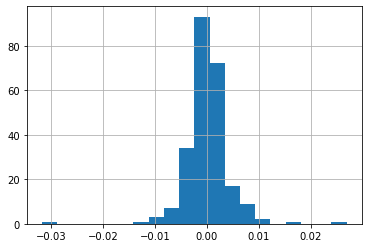

In [176]:
data['Daily Returns'].hist(bins=20);

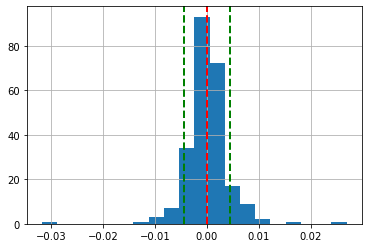

In [177]:
data['Daily Returns'].hist(bins=20)

plt.axvline(data['Daily Returns'].mean(), color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(data['Daily Returns'].std(), color='g',linestyle='dashed',linewidth=2)
plt.axvline(-data['Daily Returns'].std(), color='g',linestyle='dashed',linewidth=2);

After let's see on Kurtosis. 
It tells us the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.

In [178]:
data['Daily Returns'].kurtosis()

16.4775908437708

And the last, again, have a separeted view on the features:

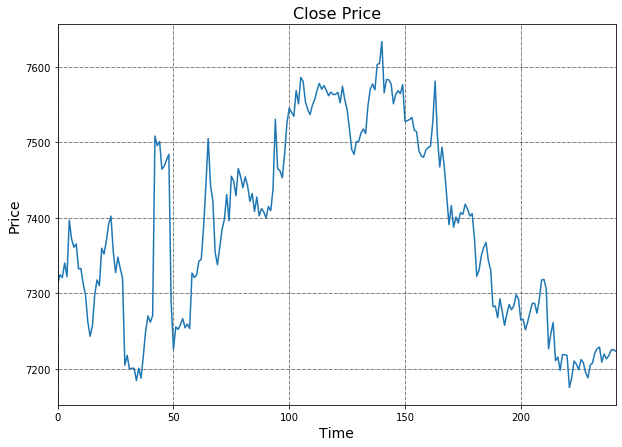

In [179]:
data['close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

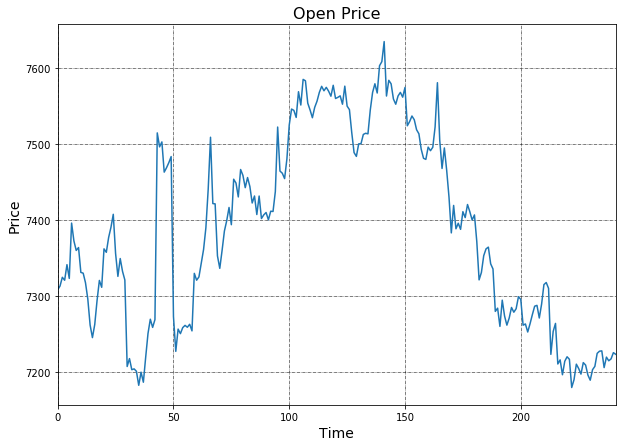

In [180]:
data['open'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Open Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

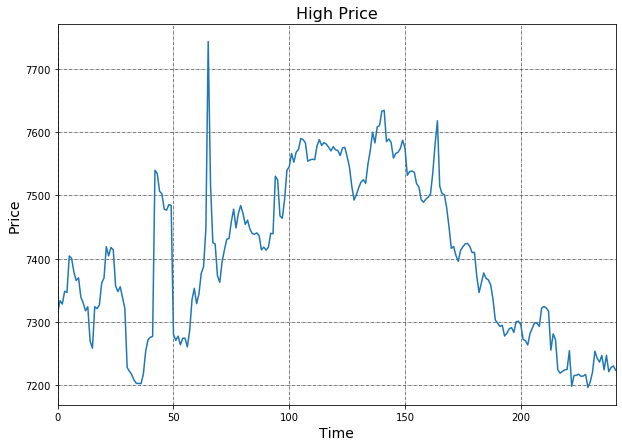

In [181]:
data['high'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("High Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

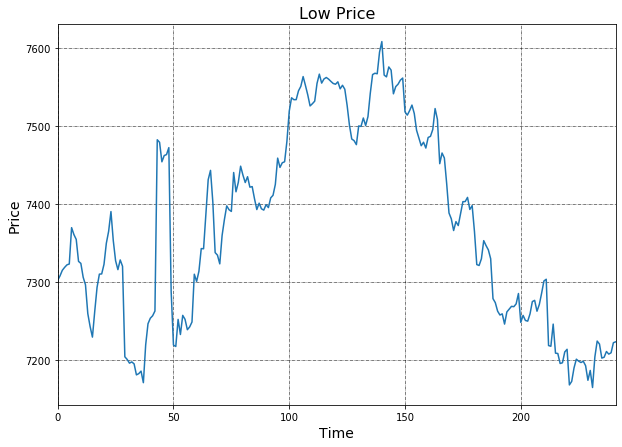

In [182]:
data['low'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Low Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

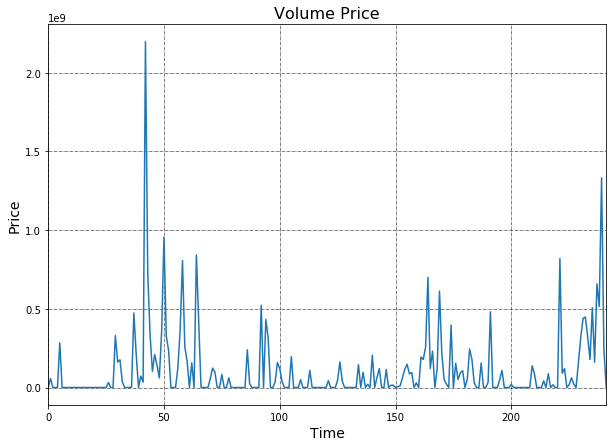

In [183]:
data['volume'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Volume Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Now, let us have a look on the second approach: 
    - Parse data using approach from scratch from Yahoo web application(Stream)

In [184]:
#Imports 

import bs4
import requests
from bs4 import BeautifulSoup
import logging
import datetime
from multiprocessing import Process, current_process
from multiprocessing import Pool
import os 

#### Plan to parse  Facebook's  stock features:

<b>Write functions for parsing all this features from: http://in.finance.yahoo.com/quote/FB?p=FB</b>
 - <s>Previous close</s>
 - <s>Open</s>
 - <s>Bid</s>
 - <s>Volume</s>
 - <s>Avg. volume</s>



Below there are 5 functions which will parse the data

In [185]:
#Should be Global value for while datetime.datetime.now().second < 20:
#Execute ray.shutdown() in case if ray.init() inicialised once
#ray.shutdown()
# if ray.is_initialized() == True:
#     ray.shutdown()
# ray.init(local_mode=True)

#@ray.remote
def parse_price(link_for_company):
    process_id = os.getpid()
    price = []
    while datetime.datetime.now().second < 59:
        r = requests.get('{}'.format(link_for_company))
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        price.append(soup.find_all('div', {'class' : 'My(6px) Pos(r) smartphone_Mt(6px)'})[0].find('span').text)    
    print(f'Process ID: {process_id}')    
    return price

#@ray.remote
def parse_close(link_for_company):
    process_id = os.getpid()
    Close = []
    while datetime.datetime.now().second < 59:
        r = requests.get('{}'.format(link_for_company))
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        Close.append(soup.find_all('td', {'class' : 'Ta(end) Fw(600) Lh(14px)', 'data-test' : 'PREV_CLOSE-value'})[0].find('span').text)
    print(f'Process ID: {process_id}')    
    return Close

#@ray.remote
def parse_open(link_for_company):
    process_id = os.getpid()
    Open = []
    while datetime.datetime.now().second < 59:
        r = requests.get('{}'.format(link_for_company))
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        Open.append(soup.find_all('td', {'class' : 'Ta(end) Fw(600) Lh(14px)', 'data-test' : 'OPEN-value'})[0].find('span').text)
    print(f'Process ID: {process_id}')    
    return Open

#@ray.remote
def parse_bid(link_for_company):
    process_id = os.getpid()
    Bid = []
    while datetime.datetime.now().second < 59:
        r = requests.get('{}'.format(link_for_company))
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        variables = list((soup.find_all('td', {'class': 'Ta(end) Fw(600) Lh(14px)', 'data-test': 'BID-value'})[0].find('span').text.split(' ')))
        Bid.append([float(variable) for variable in variables if not variable.isalpha()])
    print(f'Process ID: {process_id}')    
    return Bid

#@ray.remote
def parse_volume(link_for_company):
    process_id = os.getpid()
    Volume = []
    while datetime.datetime.now().second < 59:
        r = requests.get('{}'.format(link_for_company))
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        Volume.append(soup.find_all('td', {'class' : 'Ta(end) Fw(600) Lh(14px)', 'data-test' : 'TD_VOLUME-value'})[0].find('span').text)
    print(f'Process ID: {process_id}')    
    return Volume

#@ray.remote
def parse_average_volume(link_for_company):
    process_id = os.getpid()
    AverageVolume = []
    while datetime.datetime.now().second < 59:
        r = requests.get('{}'.format(link_for_company))
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        AverageVolume.append(soup.find_all('td', {'class' : 'Ta(end) Fw(600) Lh(14px)', 'data-test' : 'AVERAGE_VOLUME_3MONTH-value'})[0].find('span').text)
    print(f'Process ID: {process_id}')    
    return AverageVolume    

#### Let us check these functions

In [186]:
parse_open(link_for_company='http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


['202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',
 '202.35',

In [197]:
parse_close('http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


['202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26',
 '202.26']

As we can observe, we got the Open and Close price values for one minute. <br>
But it is not interesting, because usually they change just once per day.<br>
    - Let us have a look on a real price of stock during the minute;

In [198]:
parse_price('http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


['194.90',
 '194.90',
 '194.90',
 '194.93',
 '194.96',
 '194.96',
 '195.01',
 '194.99',
 '194.99',
 '194.99',
 '194.94',
 '194.94',
 '195.11',
 '195.17',
 '195.17',
 '195.29',
 '195.25',
 '195.19',
 '195.22',
 '195.19',
 '195.19',
 '195.26',
 '195.26',
 '195.33',
 '195.37',
 '195.25',
 '195.26',
 '195.22',
 '195.24',
 '195.20',
 '195.20',
 '195.18',
 '195.21',
 '195.20',
 '195.20']

Let us have a look on the differencies of price during one minute;

Process ID: 26409


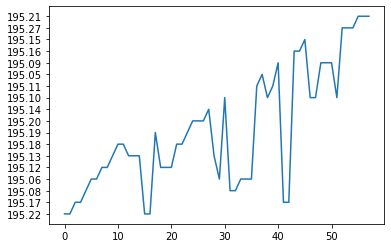

In [199]:
prices = parse_price('http://in.finance.yahoo.com/quote/FB?p=FB')

plt.plot(prices);

Additionaly we can create a DataFrame using parsed information

In [200]:
Open = parse_open('http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


In [201]:
Close = parse_close('http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


In [202]:
Bid = parse_bid('http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


In [203]:
Avg = parse_average_volume('http://in.finance.yahoo.com/quote/FB?p=FB')

Process ID: 26409


In [204]:
# #Define a dict for DataFrame
# dic = {'Open': Open, 'Close': Close, 'Bid': Bid, 'Price': prices, 'Average': Avg}

# #Define a df
# df = pd.DataFrame(columns = ['Open', 'Close', 'Bid', 'Price', 'Average'], data = dic)

### Important

Here we will face with the issue of different lengthes of results, because the functions start parsing on each moment of time, but will finish in the end of the minute.
I have done this step expressly, in order to put attention on the <b>Asynchronous Executing</b> of the program;

In [205]:
#Check different lengthes
dic = {'Open': Open, 'Close': Close, 'Bid': Bid, 'Price': prices, 'Average': Avg}
[len(key) for key in dic.keys()]

[4, 5, 3, 5, 7]

In order to solve this step, there are lot's of different solutions such as: 
    - import lib multiprocessing
    - import lib roy
    - import lib threads
    - import lib async
    - ...
    
One of these solutions will be used in the project.

In [206]:
# link_for_company = 'http://in.finance.yahoo.com/quote/FB?p=FB'
# list_of_functions = [parse_price, parse_close, parse_open, parse_bid, parse_volume, parse_average_volume]
# processes = []

# for function in list_of_functions:
#     process = Process(target=function, args=(link_for_company, ))
#     processes.append(process)
#     process.start()